In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('Position_Salaries.csv')

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
x=dataset.iloc[:,1:2].values

In [5]:
y=dataset.iloc[:,2:].values

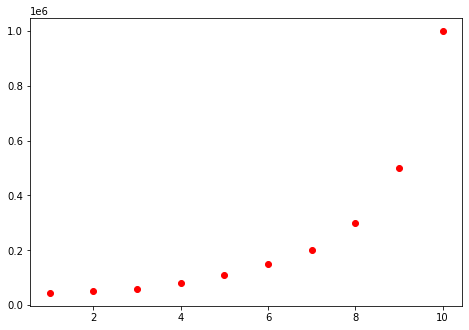

In [24]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x,y,color='r')

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [10]:
poly=PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(x)

In [11]:
pilreg=LinearRegression()
pilreg.fit(x_poly,y)

LinearRegression()

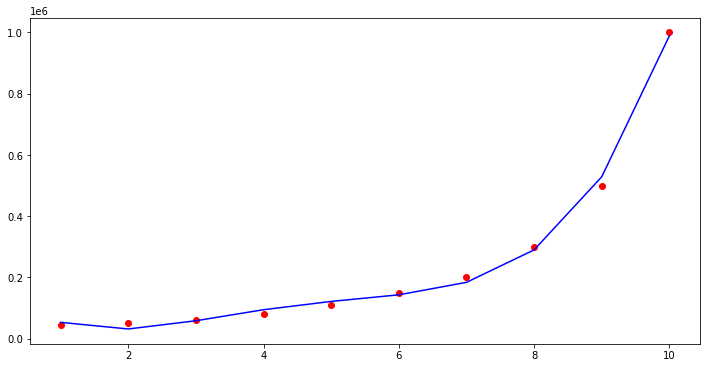

In [12]:
plt.figure(figsize=(12, 6))
plt.scatter(x,y,color='red')
plt.plot(x,pilreg.predict(poly.fit_transform(x)),color='blue')

In [13]:
pilreg.predict(poly.fit_transform([[3]]))

array([[58642.19114218]])

In [14]:
#Ridge regression

from sklearn.linear_model import Ridge
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
# scaling the inputs

scaler = StandardScaler()
scaled_X = scaler.fit_transform(x)

scaled_X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [16]:
# Train Test split will be used for both models
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y,test_size = 0.3)

In [17]:
# training model with 0.5 alpha value
model = Ridge(alpha = 0.5, normalize = False, random_state = 42)
model.fit(X_train, y_train)

Ridge(alpha=0.5, random_state=42)

In [18]:
# predicting the y_test
y_pred = model.predict(X_test)

In [19]:
score=model.score(X_test, y_test)
print("Model score:",score)

Model score: -10.370107958280155


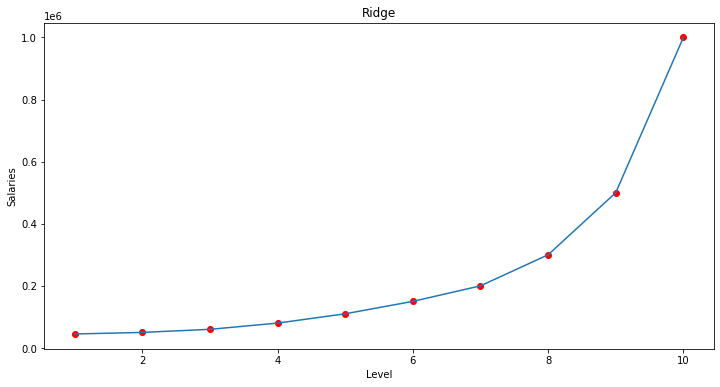

In [20]:
# Display results
plt.figure(figsize=(12, 6))

ax = plt.gca()
ax.plot(x,y)
plt.scatter(x,y,color='red')
#ax.set_xscale("log")
plt.xlabel("Level")
plt.ylabel("Salaries")
plt.title("Ridge")
plt.axis("tight")
plt.show()

In [21]:
model.coef_

array([[223252.86817183]])

In [22]:
model.intercept_

array([261071.90060798])

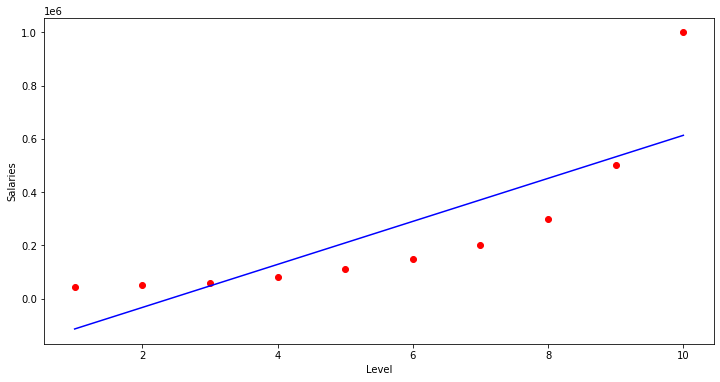

In [23]:
#Linear Regression

from sklearn import linear_model

reg = linear_model.LinearRegression() # create object for linear regression
reg.fit(x,y) # fit the data for to train the model 

plt.figure(figsize=(12, 6))
plt.xlabel("Level")
plt.ylabel("Salaries")

plt.scatter(dataset['Level'],dataset['Salary'],color='red')
plt.plot(dataset.Level,reg.predict(dataset[['Level']]),color='blue')